<a href="https://colab.research.google.com/github/CelikAbdullah/deep-learning-notebooks/blob/main/Computer%20Vision/applications/image%20classification/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import numpy as np
from tensorflow import keras

# Load MNIST dataset

MNIST is a built-in dataset in the framework. That means that it is automatically randomly shuffled and presplit into training and testing data.

In [8]:
# load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [9]:
# print the shape of training & test set
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


As we can see, the MNIST dataset consists of 60000 training and 10000 test examples with an even distribution across the ten digits 0 to 9.

Each sample consists of a 28x28-pixel grayscale image. So, the number of channels is 1.

# Prepare the MNIST dataset for training

We are able to increase the speed at which the parameters learn the optimal values and increase our chances of convergence by squashing the input values into a smaller range. Therefore, we divide each value by 255.

In [10]:
# convert values to float32 & scale images to the [0,1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [11]:
# print the shape of training & test set
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Let's make sure that our images have a shape of (28,28,1).

In [12]:
# bring images into a shape of (28,28,1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [13]:
# print the shape of training & test set
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In order to compare our output vector, we need a 10-element vector as label. So, we have to convert the scalar-value labels into 10-element vectors with a 1 in the corresponding index.
This is known as one-hot encoding.

In Keras, we can achieve one-hot encoding of labels via the helper method to_categorical.

In [15]:
# we have 10 digits
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [16]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


# Build the model

We build a very simple CNN.

In [19]:
def get_model(shape=(28,28,1)):
  inputs = keras.Input(shape=shape)

  # 1st conv layer + max pooling
  x = keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
  x = keras.layers.MaxPooling2D(pool_size=2)(x)

  # 2nd conv layer + max pooling
  x = keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
  x = keras.layers.MaxPooling2D(pool_size=2)(x)

  # flatten the input for the dense layer
  x = keras.layers.Flatten()(x)

  # apply dropout for regularization to combat overfitting that might occur
  x = keras.layers.Dropout(0.5)(x)

  # softmax layer
  outputs = keras.layers.Dense(units=num_classes, activation="softmax")(x)

  # build the model
  model = keras.Model(inputs=inputs, outputs = outputs, name="simple_cnn_for_mnist")

  return model

In [29]:
# create our simple CNN
simple_cnn = get_model()

In [30]:
# print a summary of our CNN
simple_cnn.summary()

Model: "simple_cnn_for_mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)     

# Compile the model

In [31]:
# define the optimizer
optimizer = "adam"

# define the loss function
loss="categorical_crossentropy"

# define the metrics list
metrics=["accuracy"]

# compile the model
simple_cnn.compile(optimizer=optimizer,
                   loss=loss,
                   metrics=metrics)

# Define callbacks

In [32]:
# define the filepath
filepath = "my_simple_cnn.keras"

# the ModelCheckpoint callback will save the checkpoint only if the
# validation loss is smaller than the last checkpoint
checkpoint = keras.callbacks.ModelCheckpoint(filepath, save_best_only=True, monitor="val_loss")

# the EarlyStopping callback sets an early stop when the validation
# loss has stopped reducing for 3 epochs
earlystop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

# Train

During the training, we use 10% of the training set as validation.

In [33]:
history = simple_cnn.fit(x_train,
                         y_train,
                         batch_size=128,
                         epochs=50,
                         callbacks = [checkpoint, earlystop],
                         validation_split=0.1)

Epoch 1/50
422/422 [==============================] - 53s 124ms/step - loss: 0.3746 - accuracy: 0.8874 - val_loss: 0.0837 - val_accuracy: 0.9775
Epoch 2/50
422/422 [==============================] - 49s 116ms/step - loss: 0.1141 - accuracy: 0.9649 - val_loss: 0.0604 - val_accuracy: 0.9847
Epoch 3/50
422/422 [==============================] - 48s 113ms/step - loss: 0.0845 - accuracy: 0.9744 - val_loss: 0.0474 - val_accuracy: 0.9862
Epoch 4/50
422/422 [==============================] - 49s 115ms/step - loss: 0.0723 - accuracy: 0.9772 - val_loss: 0.0440 - val_accuracy: 0.9875
Epoch 5/50
422/422 [==============================] - 47s 111ms/step - loss: 0.0638 - accuracy: 0.9800 - val_loss: 0.0390 - val_accuracy: 0.9898
Epoch 6/50
422/422 [==============================] - 45s 107ms/step - loss: 0.0558 - accuracy: 0.9829 - val_loss: 0.0388 - val_accuracy: 0.9898
Epoch 7/50
422/422 [==============================] - 47s 111ms/step - loss: 0.0531 - accuracy: 0.9834 - val_loss: 0.0357 - val_ac

# Visualization

In [34]:
import matplotlib.pyplot as plt

First, we look at how the training and validation loss evolved during training:

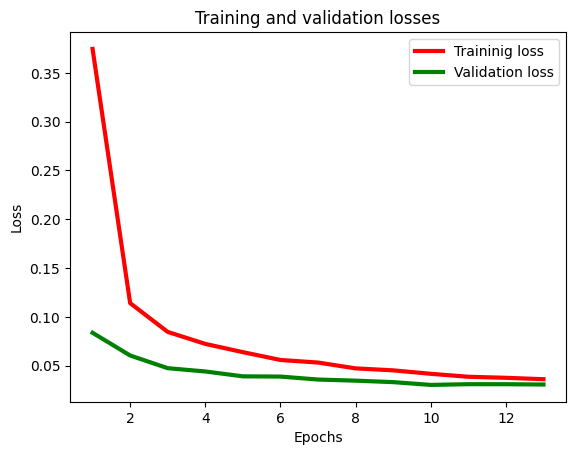

In [35]:
losses = history.history["loss"]
val_losses = history.history["val_loss"]
epochs = range(1, len(val_losses) + 1)

plt.plot(epochs, losses, color="red", linestyle="solid", label="Traininig loss", linewidth=3)
plt.plot(epochs, val_losses, color="green", linestyle="solid", label="Validation loss", linewidth=3)

plt.title("Training and validation losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Now, let's look at how the training and validation accuracy evolved during training:

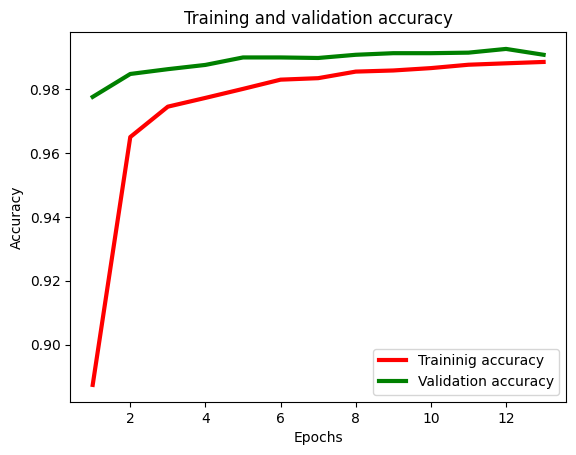

In [36]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(val_acc) + 1)
plt.plot(epochs, acc, color="red", linestyle="solid", label="Traininig accuracy", linewidth=3)
plt.plot(epochs, val_acc, color="green", linestyle="solid", label="Validation accuracy", linewidth=3)

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Evaluate the model

Now, we look at how our model performs on data it never has seen before.

In [37]:
test_loss, test_acc = simple_cnn.evaluate(x_test, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.02899196557700634
Test accuracy: 0.9901999831199646


We can state that our simple convnet achieves 99% test accuracy on the test data.